<a href="https://colab.research.google.com/github/dharsh70/my-Colab-projects-AI/blob/main/face2101043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q face_recognition
!pip install -q fer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches

In [ ]:
%matplotlib inline
import face_recognition
import numpy as np

In [ ]:
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
from fer import FER
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
detector = FER()
#Upload image with faces
uploaded = files.upload()
#Display image
image = face_recognition.load_image_file(list(uploaded.keys())[0])


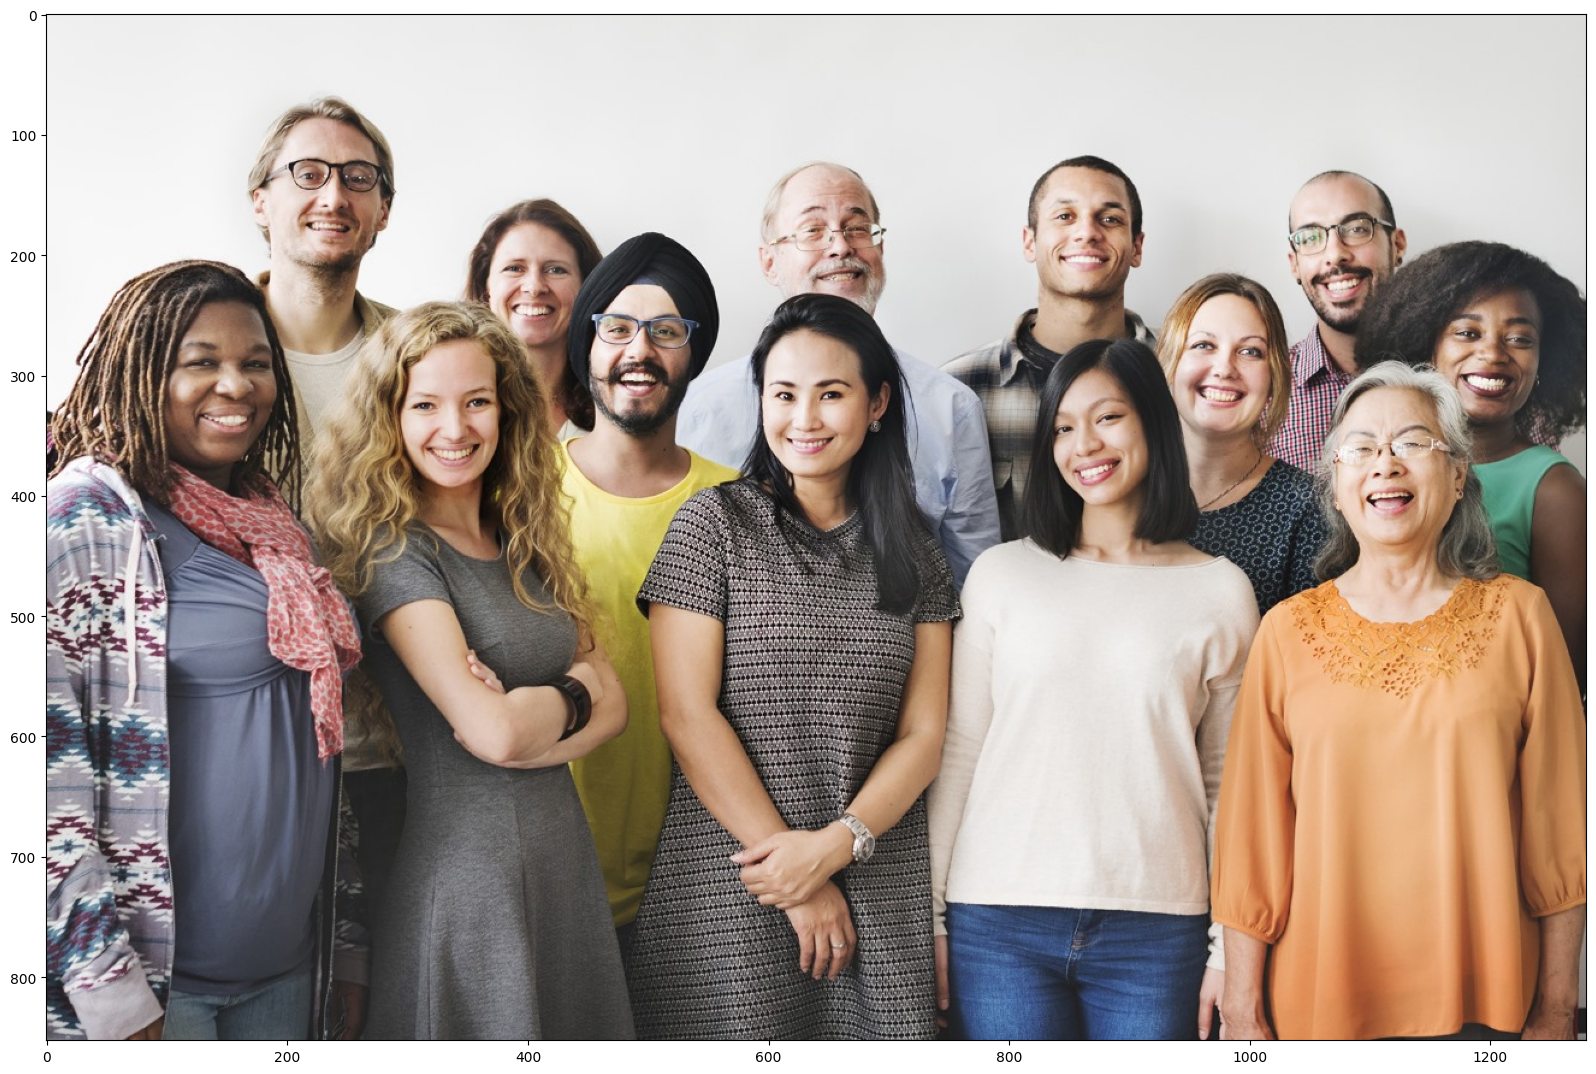

In [ ]:
boundary = 24
im = PIL.Image.open(list(uploaded.keys())[0])
height = (im.size[1] / im.size[0]) * 20
fig=plt.subplots(figsize=(20,height))
imshow(im)


Number of faces: 12
Time taken: 1.17  seconds


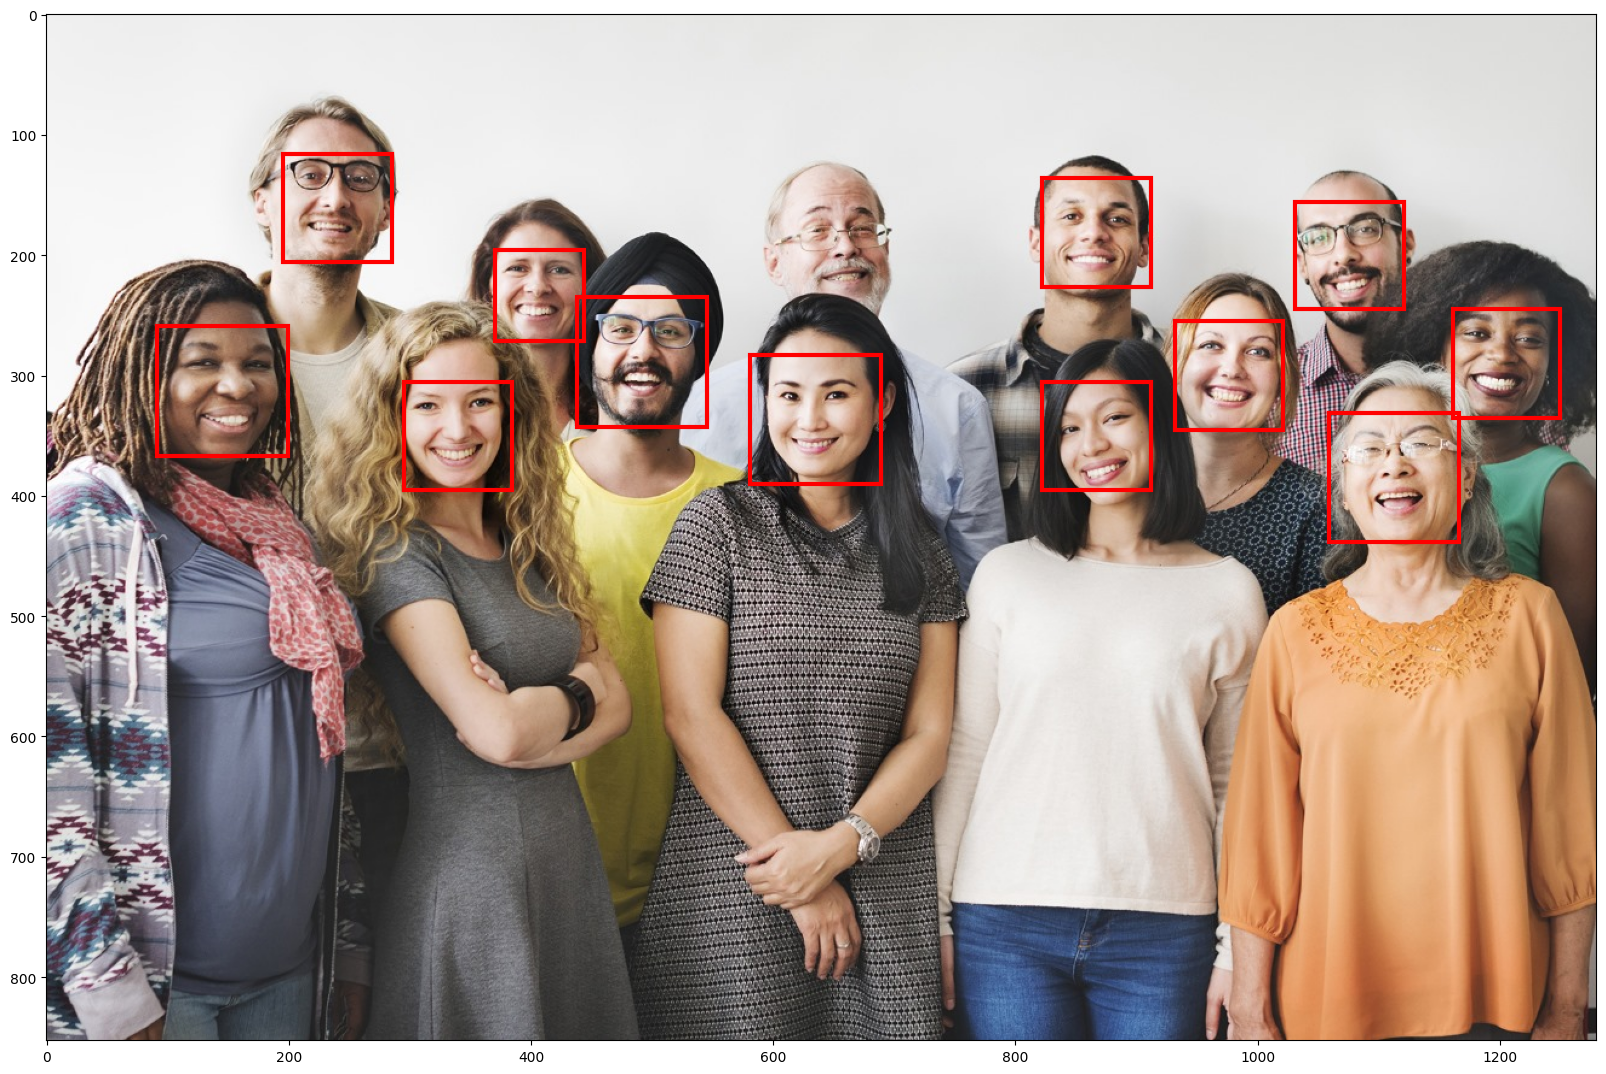

In [ ]:
# Use 'Face Recognition' library and draw a red box around the faces
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(20,height))
for face_location in face_locations:
    top, right, bottom, left = face_location
    ax.imshow(im,aspect='auto')
    rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
end = time.time()
print("Number of faces:",len(face_locations))
print("Time taken:",round(end-start,2)," seconds")


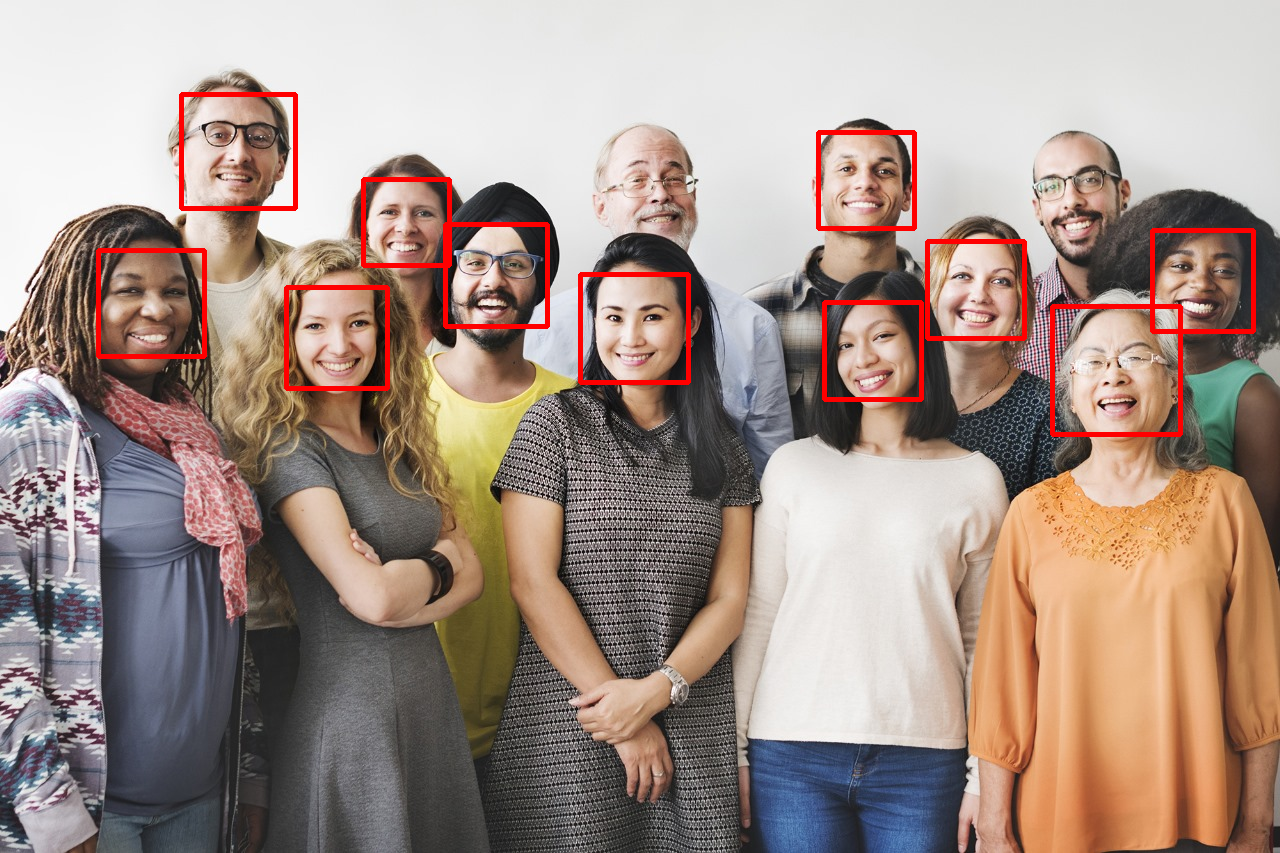

Time taken: 0.9291400909423828  seconds
Number of faces: 11


In [ ]:
#Use Haar Cascades and draw a red box around the faces
start = time.time()
#Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#Read the input image
img = cv2.imread(list(uploaded.keys())[0])
#Convert into GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Detect Faces
faces = face_cascade.detectMultiScale(gray, 1.3, 4)
#Draw rectangle around each faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 3)
#Display the output
ims = cv2.resize(img,(im.size[0],im.size[1]))
cv2_imshow(ims)
cv2.waitKey()
end = time.time()
print("Time taken:",end-start," seconds")
print("Number of faces:",len(faces))
